In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from scipy.stats import ttest_rel

In [20]:
data = pd.read_csv('WorldCupMerged.csv')
data.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_winner,...,first_shooter,Shootout,team,scorer,minute,own_goal,penalty,Total attendance,Average attendance per game,year
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,...,NaN,False,United States,Bart McGhee,23.0,False,False,434000,24139,1930
1,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,...,NaN,False,United States,Tom Florie,45.0,False,False,434000,24139,1930
2,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,...,NaN,False,United States,Bert Patenaude,69.0,False,False,434000,24139,1930


In [21]:
european_countries = ['England', 'France', 'Germany', 'Spain', 'Italy', 'Netherlands', 'Portugal', 'Belgium', 'Switzerland', 'Sweden', 'Denmark', 'Croatia', 'Serbia', 'Russia', 'Greece', 'Norway', 'Austria', 'Scotland', 'Turkey', 'Ukraine', 'Poland', 'Wales', 'Czech Republic', 'Hungary']
south_american_countries = ['Brazil', 'Argentina', 'Uruguay', 'Chile', 'Colombia', 'Peru', 'Paraguay', 'Ecuador', 'Venezuela', 'Bolivia']

# Function to determine if a team belongs to Europe or South America
def get_region(team):
    if team in european_countries:
        return 'Europe'
    elif team in south_american_countries:
        return 'South America'
    else:
        return 'Other'
# Apply the function to label each match with the corresponding region
data['home_region'] = data['home_team'].apply(get_region)
data['away_region'] = data['away_team'].apply(get_region)
data['game_winner'] = data['game_winner'].apply(get_region)

# Filter the data for matches where Europe plays against South America
europe_vs_south_america = data[((data['home_region'] == 'Europe') & (data['away_region'] == 'South America')) |
                               ((data['home_region'] == 'South America') & (data['away_region'] == 'Europe'))]


data.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_winner,...,team,scorer,minute,own_goal,penalty,Total attendance,Average attendance per game,year,home_region,away_region
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,Other,...,United States,Bart McGhee,23.0,False,False,434000,24139,1930,Europe,Other
1,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,Other,...,United States,Tom Florie,45.0,False,False,434000,24139,1930,Europe,Other
2,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,Other,...,United States,Bert Patenaude,69.0,False,False,434000,24139,1930,Europe,Other
3,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,Europe,...,France,Lucien Laurent,19.0,False,False,434000,24139,1930,Europe,Other
4,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,Europe,...,France,Marcel Langiller,40.0,False,False,434000,24139,1930,Europe,Other
5,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,Europe,...,France,André Maschinot,43.0,False,False,434000,24139,1930,Europe,Other
6,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,Europe,...,Mexico,Juan Carreño,70.0,False,False,434000,24139,1930,Europe,Other
7,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,Europe,...,France,André Maschinot,87.0,False,False,434000,24139,1930,Europe,Other
8,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Other,...,Yugoslavia,Aleksandar Tirnanić,21.0,False,False,434000,24139,1930,South America,Other
9,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Other,...,Yugoslavia,Ivan Bek,30.0,False,False,434000,24139,1930,South America,Other


C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


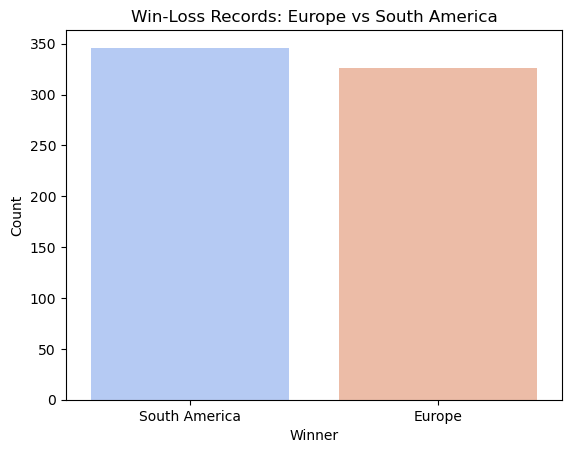

game_winner
South America    346
Europe           326
Name: count, dtype: int64

In [29]:
europe_vs_south_america_no_other = europe_vs_south_america[europe_vs_south_america['game_winner'] != 'Other']

#plt.figure(figsize=(10, 6))
sns.countplot(x='game_winner', data=europe_vs_south_america_no_other, palette='coolwarm')
plt.title('Win-Loss Records: Europe vs South America')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()

europe_vs_south_america_no_other.game_winner.value_counts()

C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


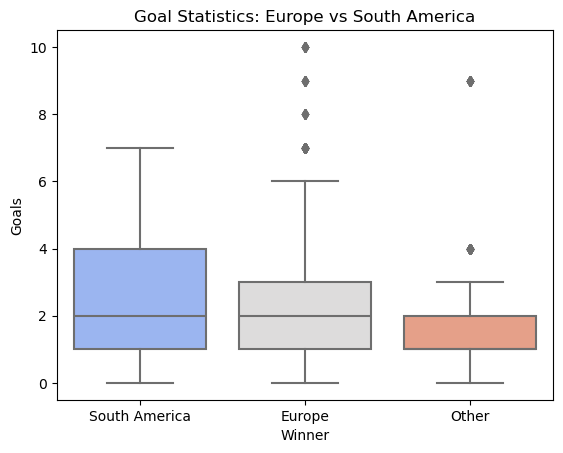

In [30]:
#plt.figure(figsize=(8, 8))
sns.boxplot(x='game_winner', y='home_score', data=data, palette='coolwarm', order = ['South America', 'Europe', 'Other'])
plt.title('Goal Statistics: Europe vs South America')
plt.xlabel('Winner')
plt.ylabel('Goals')
plt.show()